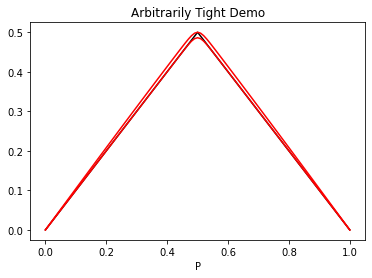

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Clear all
plt.clf()

dx = 0.001
x = np.arange(-10, 10 + dx, dx)

f0 = norm.pdf(x, 0, 1)
f1 = norm.pdf(x, 2.56, 1)

fmin = np.minimum(f0, f1)

a = 50
p = np.arange(0, 1.01, 0.01)
gl = 1/a * np.log((1 + np.exp(-a)) / (np.exp(-a * p) + np.exp(-a * (1 - p))))
gu = gl + (1 - 2 * gl[np.where(p == 0.5)]) * 0.5 * np.sin(np.pi * p)

# Plotting
plt.figure(1)
plt.plot(p, np.minimum(p, 1 - p), 'k')
plt.plot(p, gl, 'r')
plt.plot(p, gu, 'r')
plt.title("Arbitrarily Tight Demo")
plt.xlabel('P')
# plt.savefig("demo.png")
# plt.ylabel

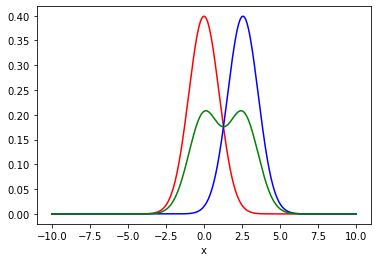

In [4]:

# Calculate glx and gux
fx = 0.5 * (f0 + f1)
px = f0 / (f0 + f1)

glx = np.sum(1/a * np.log((1 + np.exp(-a)) / (np.exp(-a * px) + np.exp(-a * (1 - px)))) * fx * dx)
gux = np.sum((glx + (1 - 2 * gl[np.where(p == 0.5)]) * 0.5 * np.sin(np.pi * px)) * fx * dx)

BER = np.sum(np.minimum(px, 1 - px) * fx * dx)



plt.figure(2)
plt.plot(x, f0, 'r')
plt.plot(x, f1, 'b')
plt.plot(x, fx, 'g')
plt.xlabel('x')

plt.show()


In [ ]:
glx